# Utilisation de pnp pour la calibration
https://docs.opencv.org/4.x/d5/d1f/calib3d_solvePnP.html



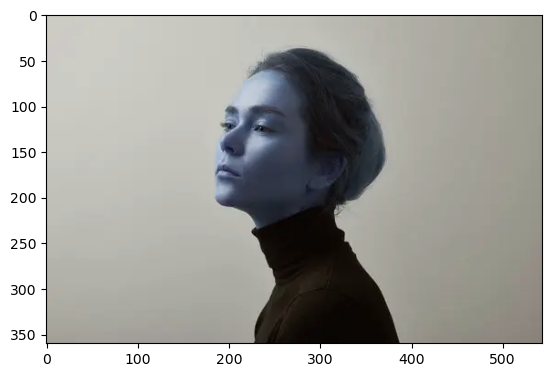

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("img/image.webp")

plt.imshow(img)

Mise en place des paramètre des points

In [46]:
size = img.shape
image_points_2D = np.array(
    [
        (196, 141),  # Nose tip
        (190, 202),  # Chin
        (196, 124),  # Left eye corner
        (236, 128),  # Right eye corner
        (186, 175),  # Left mouth
        (214, 177),  # Right mouth
    ],
    dtype="double",
)

figure_points_3D = np.array(
    [
        (0.0, 0.0, 0.0),  # Nose tip
        (0.0, -330.0, -65.0),  # Chin
        (-225.0, 170.0, -135.0),  # Left eye left corner
        (225.0, 170.0, -135.0),  # Right eye right corne
        (-150.0, -150.0, -125.0),  # Left Mouth corner
        (150.0, -150.0, -125.0),  # Right mouth corner
    ]
)

print("size :\n", size, "\n")
print("image_points_2D :\n", image_points_2D, "\n")
print("figure_points_3D :\n", figure_points_3D, "\n")

size :
 (360, 544, 3) 

image_points_2D :
 [[196. 141.]
 [190. 202.]
 [196. 124.]
 [236. 128.]
 [186. 175.]
 [214. 177.]] 

figure_points_3D :
 [[   0.    0.    0.]
 [   0. -330.  -65.]
 [-225.  170. -135.]
 [ 225.  170. -135.]
 [-150. -150. -125.]
 [ 150. -150. -125.]] 



Calcule des paramètres intrasèque de la caméra 
A = \begin{bmatrix}
    f_x & 0 & c_x \\
    0 & f_y & c_y \\
    0 & 0 & 1 \\
\end{bmatrix}

\begin{itemize}
    \item \(f_x\) - Longueur focale horizontale exprimée en pixels.
    \item \(f_y\) - Longueur focale verticale exprimée en pixels.
    \item \(c_x\) - Coordonnée du point principal (centre optique) en direction horizontale, exprimée en pixels.
    \item \(c_y\) - Coordonnée du point principal (centre optique) en direction verticale, exprimée en pixels.
\end{itemize}

In [47]:
distortion_coeffs = np.zeros((4, 1))
focal_length = size[1]
center = (size[1] / 2, size[0] / 2)
matrix_camera = np.array(
    [[focal_length, 0, center[0]], [0, focal_length, center[1]], [0, 0, 1]],
    dtype="double",
)

print("distortion_coeffs :\n", distortion_coeffs, "\n")
print("focal_length :\n", focal_length, "\n")
print("center :\n", center, "\n")
print("matrix_camera :\n", matrix_camera, "\n")

distortion_coeffs :
 [[0.]
 [0.]
 [0.]
 [0.]] 

focal_length :
 544 

center :
 (272.0, 180.0) 

matrix_camera :
 [[544.   0. 272.]
 [  0. 544. 180.]
 [  0.   0.   1.]] 



In [48]:
ssuccess, vector_rotation, vector_translation = cv2.solvePnP(
    figure_points_3D, image_points_2D, matrix_camera, distortion_coeffs, flags=0
)

print("success :\n", success, "\n")
print("vector_rotation :\n", vector_rotation, "\n")
print("vector_translation :\n", vector_translation, "\n")

success :
 True 

vector_rotation :
 [[ 2.70513138]
 [ 0.26820376]
 [-1.16503355]] 

vector_translation :
 [[-489.60353976]
 [-209.78582541]
 [3334.82019672]] 



In [49]:
nose_end_point2D, jacobian = cv2.projectPoints(
    np.array([(0.0, 0.0, 1000.0)]),
    vector_rotation,
    vector_translation,
    matrix_camera,
    distortion_coeffs,
)

print("nose_end_point2D :\n", nose_end_point2D, "\n")
print("jacobian :\n", jacobian, "\n")

nose_end_point2D :
 [[[29.0860496 88.3523844]]] 

jacobian :
 [[-2.39991032e+01  1.56363392e+01  6.42682970e+01  2.04554403e-01
   0.00000000e+00  9.13402906e-02 -4.46532997e-01  0.00000000e+00
   1.00000000e+00  0.00000000e+00 -5.53294380e+01 -1.26025974e+01
   8.18473689e+01  3.40847146e+02]
 [ 1.62478182e+02 -3.66659205e+01 -8.11937803e+01  0.00000000e+00
   2.04554403e-01  3.44612560e-02  0.00000000e+00 -1.68469882e-01
   0.00000000e+00  1.00000000e+00 -2.08749274e+01 -4.75476192e+00
   1.54788683e+02  8.18473689e+01]] 



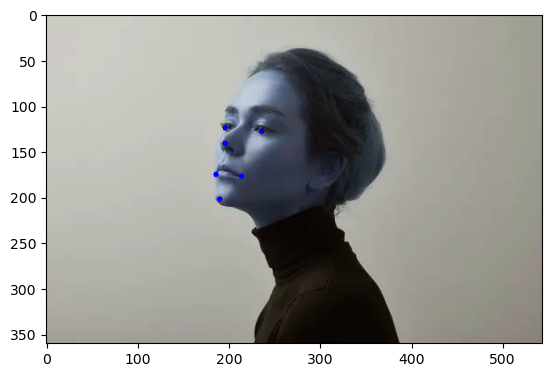

In [50]:
for p in image_points_2D:
    cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 0, 255), -1)

plt.imshow(img)

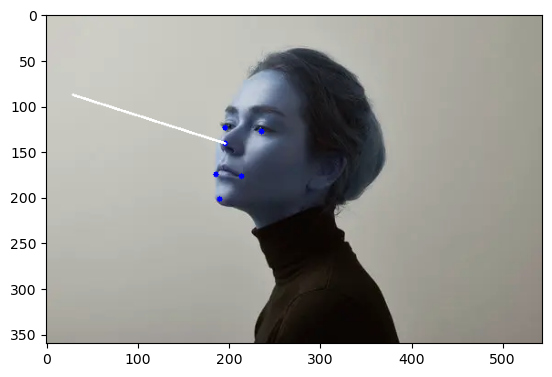

In [53]:
point1 = (int(image_points_2D[0][0]), int(image_points_2D[0][1]))

point2 = (int(nose_end_point2D[0][0][0]), int(nose_end_point2D[0][0][1]))

cv2.line(img, point1, point2, (255, 255, 255), 2)

plt.imshow(img)